#Xavier initialization with logistic function

__Xavier 가중치 초기화__

__1. 좋은 초기화의 조건__


* 심층 신경망은 여러 층으로 이루어진 로짓 계산과 활성화 함수를 반복적으로 거침으로써 계산됨.<br>
* 층을 반복하더라도 활성화 값의 분포가 비슷하기 위해서는 아래의 조건이 필요함.<br>
$
z^{[i+1]} = w_1^{[i+1]}x_1^{[i]}+w_2^{[i+1]}x_2^{[i]}+...+w_n^{[i+1]}x_n^{[i]} \mbox{일 때,}\\
Var(z^{[i+1]}) = Var(x^{[i]})
$

<br>

__2. Xavier 초기화 유도__

입력값과 가중치가 정규분포를 따르고, 각각 평균이 0이라고 가정한다면, 아래와 같이 수식을 풀어 낼 수 있다.

$
Var(z) = \sum^{n}_{i=1}Var(w_ix_i)\\
= \sum^{n}_{i=1}[E(x_i)]^2var(w_i) + [E(w_i)]^2var(x_i)+Var(w_i)Var(x_i)\\
= \sum^{n}_{i=1}Var(w_i)Var(x_i)\\
= nVar(w)Var(x)
$
<br><br>
우리가 목적으로 하는 것은 바로 __$Var(z) = Var(x)$__이므로, <br>
이를 만족하는 $var(w)$는 아래와 같다.<br>
$$
var(w) = \frac{1}{n}
$$

__3. 직관적인 이해__

1. Forward propagation은 행렬곱에 의해 linear transformation을 수행함
2. 직관적으로 다음 과같다. <br> (x_1 * w_1) + (x_2 * w_2) + ... + (x_n * w_n) 
3. 즉 input unit의 갯수가 많을 수록 output z의 분산이 커지기 때문에 분산을 줄여줘야함 (logistic activation의 그래디언트 소실문제)
4. 따라서 input unit의 갯수인 1/n을 분산으로 w를 초기화하여 input x를 scaling한다.

In [0]:
%matplotlib inline
import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import pandas as pd

- 역전파 시 가중치 분포 시각화를 위한 모델 정의
<br>
- Sigmoid함수 정의 : sigmoid함수는 -5 ~ 5 범위 밖의 input value의 기울기가 0으로 수렴하는 특성을 갖는다.
<br> 딥러닝모델은 역전파시에 delta법을 활용한 chain rule을 계산하게 되는데, sigmoid의 이러한 특성은 **기울기 소실의 주요원인**이다.

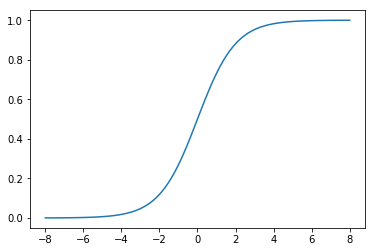

In [0]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

sig_xavi = np.linspace(-8,8,num = 100)

list_xavi = list(map(lambda x : sigmoid(x), sig_xavi))

plt.plot(sig_xavi, list_xavi)


- 정규분포 시각화

In [0]:
def xavier_initialize(scale, w_size) :
    return np.random.normal(scale = scale, size = w_size)

# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,3,1)
# ax1.hist(gaussian_distribution(0.1, 10000))
# ax2 = fig.add_subplot(1,3,2)
# ax2.hist(gaussian_distribution(0.01, 10000))
# ax3 = fig.add_subplot(1,3,3)
# ax3.hist(gaussian_distribution(0.001, 10000))

- z의 분포를 확인한다 <br>
- z의 분포에 따라 역전파시 activation 함수의 미분값의 분포를 짐작할 수있다.

----
- __정규분포 표준편차 0.1일때 z의 분포__
- number of layers : 5
- weight initialization method : gaussian distribution 

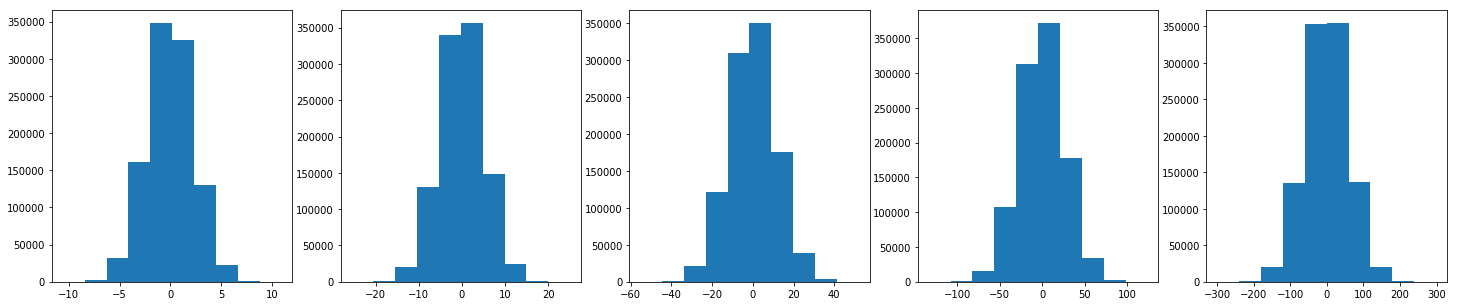

In [0]:
num_data = 2000
unit_num = 512
num_layer = 5

# X sample 생성
X = np.random.randn(num_data, unit_num)

fig = plt.figure(figsize=(25,5))
history_z1 = []
z = X
# 각 stddev마다의 분포 생성
for idx in range(num_layer) :
    W = gaussian_distribution(0.1, (unit_num,unit_num))
    z = np.matmul(z, W)
    ax = fig.add_subplot(1, 5, idx+1)
    history_z1.append(z)
    ax.hist(np.ravel(z))

----
- __정규분포 표준편차 0.01일때 z의 분포__
- number of layers : 5
- weight initialization method : gaussian distribution

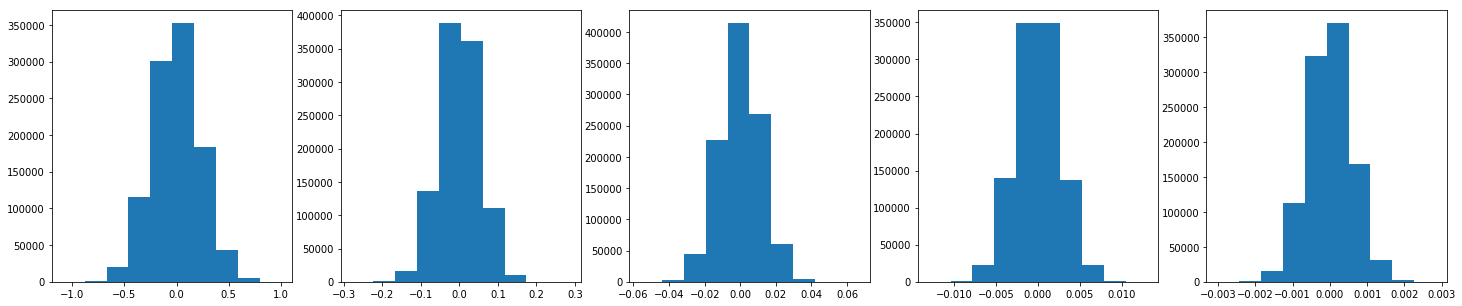

In [0]:
num_data = 2000
unit_num = 512
num_layer = 5

# X sample 생성
X = np.random.randn(num_data, unit_num)

fig = plt.figure(figsize=(25,5))
history_z2 = []
z = X
# 각 stddev마다의 분포 생성
for idx in range(num_layer) :
    W = gaussian_distribution(0.01, (unit_num,unit_num))
    z = np.matmul(z, W)
    ax = fig.add_subplot(1, 5, idx+1)
    ax.hist(np.ravel(z))
    history_z2.append(z)

----
- __정규분포 표준편차 0.001일때 z의 분포__
- number of layers : 5
- weight initialization method : gaussian distribution

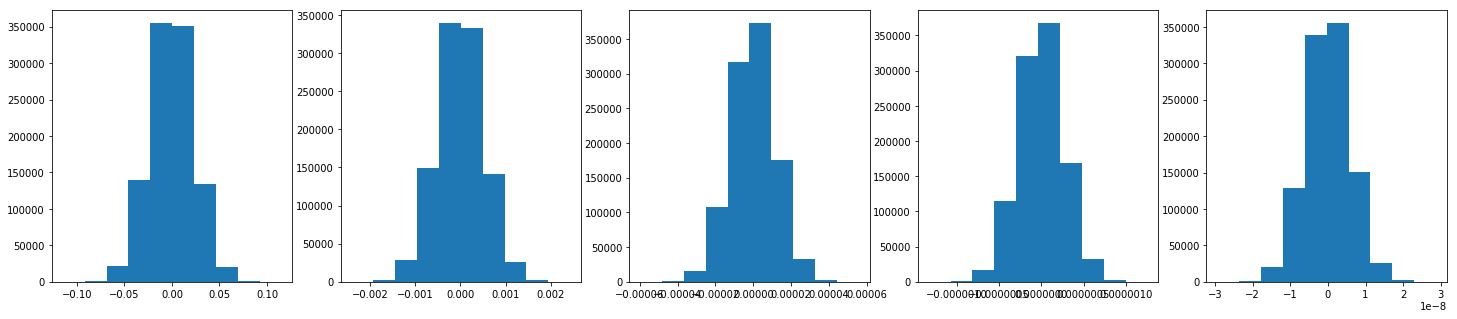

In [0]:
num_data = 2000
unit_num = 512
num_layer = 5

# X sample 생성
X = np.random.randn(num_data, unit_num)

fig = plt.figure(figsize=(25,5))
history_z3 = []
z = X
# 각 stddev마다의 분포 생성
for idx in range(num_layer) :
    W = gaussian_distribution(0.001, (unit_num,unit_num))
    z = np.matmul(z, W)
    ax = fig.add_subplot(1, 5, idx+1)
    ax.hist(np.ravel(z))
    history_z3.append(z)

#Result and conclusion

- stddev : 0.1 일때
<br> Layer를 통과할 때마다 output값의 범위가 실수 전체 범위로 발산하여 gradient descent의 문제 야기함
- stddev : 0.01 일때
<br> 각 layer의 output값의 범위가 갈수록 0을 중심으로 수렴하여 gradient의 값이 모두 같아지는 결과 초래함
- stddev : 0.001 일때
<br> 각 layer의 output값의 범위가 갈수록 0을 중심으로 수렴하여 gradient의 값이 모두 같아지는 결과 초래함

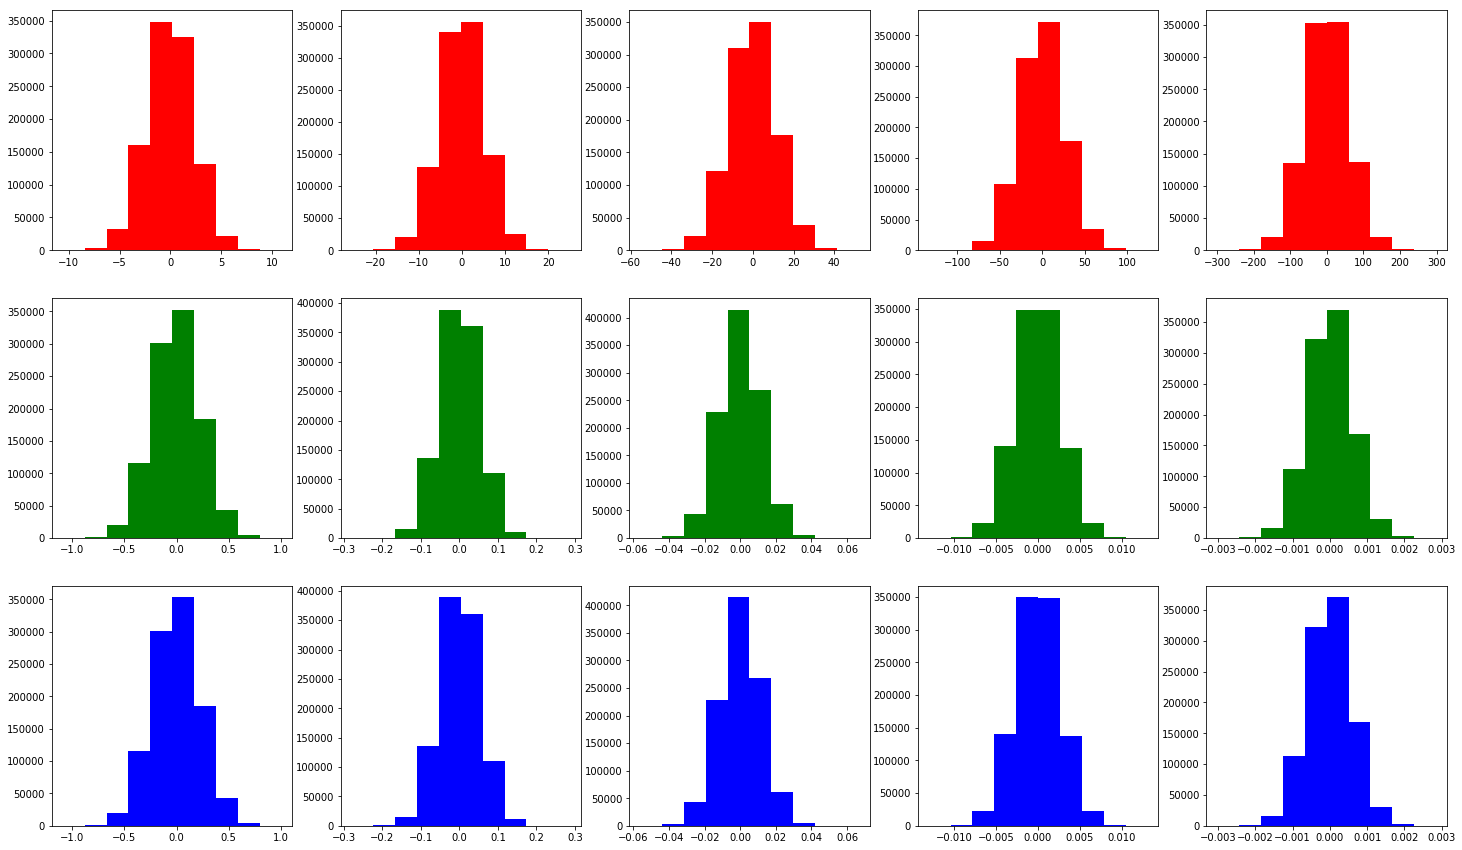

In [0]:
fig = plt.figure(figsize = (25,15))
for i, histz1 in enumerate(history_z1) :
    ax = fig.add_subplot(3,5,i+1)
    ax.hist(np.ravel(histz1),color = 'r')
for i, histz2 in enumerate(history_z2) :
    ax = fig.add_subplot(3,5,i+6)
    ax.hist(np.ravel(histz2),color = 'g')
for i, histz3 in enumerate(history_z2) :
    ax = fig.add_subplot(3,5,i+11)
    ax.hist(np.ravel(histz3), color = 'b')